In [ ]:
%%shell
rm -rf fdd
git clone https://github.com/Davidvandijcke/fdd.git
pip install geopandas folium matplotlib mapclassify contextily rasterio scikit-image geocube pandas==2.0.0



In [1]:
from FDD import FDD

In [2]:
# load libraries
import geopandas as gpd
import numpy as np
import os
import urllib
import zipfile
import re
#from geocube.api.core import make_geocube
import rasterio as rio
from rasterio.mask import mask
from rasterio.transform import from_origin
from skimage import data, img_as_float, io
from skimage.segmentation import chan_vese
from PIL import Image
import matplotlib.pyplot as plt
from scipy.io import loadmat
from geocube.api.core import make_geocube

In [3]:
# # set path
bsdir = "s3://ipsos-dvd/fdd/data/out/ukr/" # set to desired directory


## Now let's segment the map of mobile device activity

In [8]:
grid = gpd.read_file(bsdir + "grid_daily/" + "2022-11-11.geojson")


In [9]:
grid[grid.geometry.isna()].head()

Empty GeoDataFrame
Columns: [day, index_right, week, count, devices, count_jan, devices_jan, count_ratio, devices_ratio, geometry]
Index: []

In [11]:
grid.explore(column='count_ratio', cmap='Reds', legend=True,  vmax = 0.5)

In [14]:
X1 = np.array(grid.geometry.centroid.x)
X2 = np.array(grid.geometry.centroid.y)
X = np.stack([X1, X2], axis = 1)

Y = np.array(grid['count_ratio'])

# winsorize
qtile = np.quantile(Y, 0.95)
Y[Y > qtile] = qtile # 0.5

In [66]:
np.quantile(Y, 0.85)

0.08581945661700269

In [34]:
# as image
X1_width = 10000 #np.diff(np.unique(X1)).min()
X2_width = 10000 # np.diff(np.unique(X2)).min()
X = np.stack([X2, X1]).T

In [25]:
X.shape

(11837, 2)

In [71]:
# segment
#--------
# parameters
S=16
N = Y.shape[0]
#--------
resolution = 1/int(np.sqrt(N*0.5))
model = FDD(Y, X, level = S, lmbda = 5, nu = 0.002, iter = 100000, tol = 5e-5, pick_nu = "MS", CI=False, rectangle=True, resolution=resolution)
model.nu = 0.01
model.lmbda = 5 # 250
results = model.run()

In [ ]:
u = results['u']
J_grid = results['J']

In [ ]:
results['it']

0

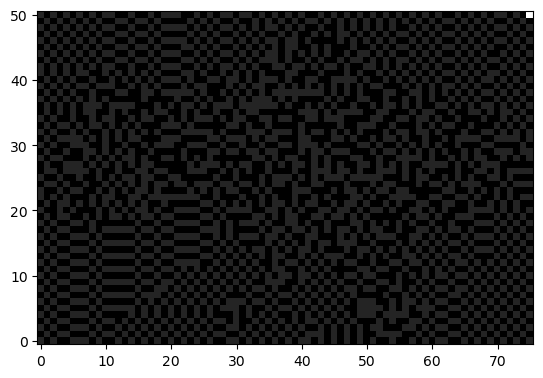

In [ ]:
plt.imshow(u, origin ="lower", cmap = "gray")
plt.show()

In [ ]:
it

0

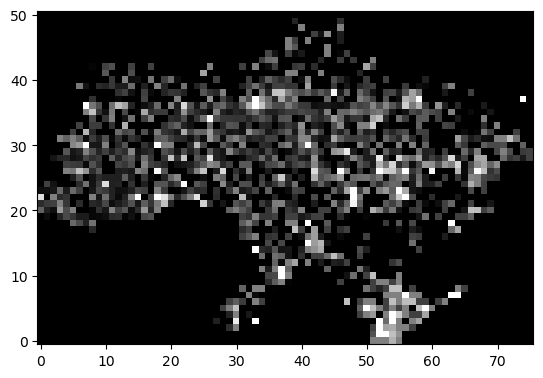

In [47]:
plt.imshow(model.grid_y, origin = "lower", cmap = "gray")
plt.show()


In [ ]:
np.array([])

array([], dtype=float64)

In [ ]:
X.shape

(11837, 2)

In [ ]:
np.sqrt(11837)

108.79797792238604